In [2]:
import torch
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from ipywidgets import interact, FloatSlider

def visualize_bivariate_gaussian(mu_0, mu_1, cov_00, cov_01, cov_10, cov_11):
    mean = torch.tensor([mu_0, mu_1])
    covariance_matrix = torch.tensor([[cov_00, cov_01],
                                      [cov_10, cov_11]])
    bivariate_dist = torch.distributions.MultivariateNormal(mean, covariance_matrix)
    N = 200
    theta_0 = torch.linspace(-3, 3, N)
    theta_1 = torch.linspace(-3, 3, N)
    Theta_0, Theta_1 = torch.meshgrid(theta_0, theta_1)
    pos = torch.stack((Theta_0, Theta_1), dim=2)
    density = torch.exp(bivariate_dist.log_prob(pos))

    custom_cmap = cm.get_cmap('viridis')

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    contour = axs[0].contourf(Theta_0, Theta_1, density, cmap=custom_cmap, levels=20)
    fig.colorbar(contour, ax=axs[0])
    axs[0].set_xlabel('θ\u2080')
    axs[0].set_ylabel('θ\u2081')
    axs[0].set_title(f'Bivariate Gaussian Contour\nμ = {mean.tolist()}, Covariance = {covariance_matrix.tolist()}')
    axs[0].set_aspect('equal')  # Set equal aspect ratio

    axs[1] = fig.add_subplot(122, projection='3d')
    surface = axs[1].plot_surface(Theta_0, Theta_1, density, cmap=custom_cmap)
    axs[1].set_xlabel('θ\u2080')
    axs[1].set_ylabel('θ\u2081')
    axs[1].set_zlabel('Density')
    axs[1].set_title(f'Bivariate Gaussian Surface\nμ = {mean.tolist()}, Covariance = {covariance_matrix.tolist()}')

    plt.tight_layout()
    plt.show()


/home/nipun.batra/miniforge3/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


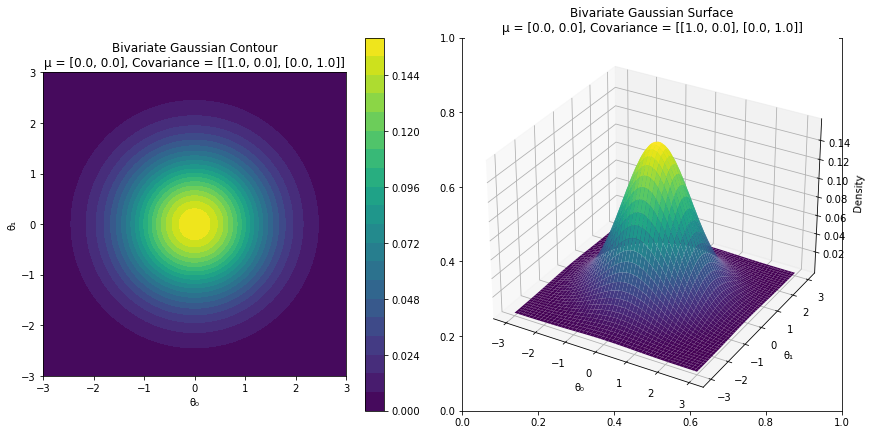

In [3]:
visualize_bivariate_gaussian(mu_0=0.0, mu_1=0.0, cov_00=1.0, cov_01=0.0, cov_10=0.0, cov_11=1.0)

In [4]:
# Create interactive version
interact(visualize_bivariate_gaussian,
         mu_0=FloatSlider(value=0.0, min=-2.0, max=2.0, step=0.1, description='μ\u2080'),
         mu_1=FloatSlider(value=0.0, min=-2.0, max=2.0, step=0.1, description='μ\u2081'),
         cov_00=FloatSlider(value=1.0, min=0.1, max=2.0, step=0.1, description='σ\u2080\u2080'),
         cov_01=FloatSlider(value=0.5, min=-1.0, max=1.0, step=0.1, description='σ\u2080\u2081'),
         cov_10=FloatSlider(value=0.5, min=-1.0, max=1.0, step=0.1, description='σ\u2081\u2080'),
         cov_11=FloatSlider(value=1.0, min=0.1, max=2.0, step=0.1, description='σ\u2081\u2081'))


interactive(children=(FloatSlider(value=0.0, description='μ₀', max=2.0, min=-2.0), FloatSlider(value=0.0, desc…

<function __main__.visualize_bivariate_gaussian(mu_0, mu_1, cov_00, cov_01, cov_10, cov_11)>